In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import plot_tree

In [15]:
data = pd.read_csv('C:\Bangkit ML 2024\Stunting\data_balita.csv')

In [16]:
data.head(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [18]:
data.columns

Index(['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi'], dtype='object')

In [19]:
data["Jenis Kelamin"].unique()

array(['laki-laki', 'perempuan'], dtype=object)

In [20]:
data["Status Gizi"].unique()

array(['stunted', 'tinggi', 'normal', 'severely stunted'], dtype=object)

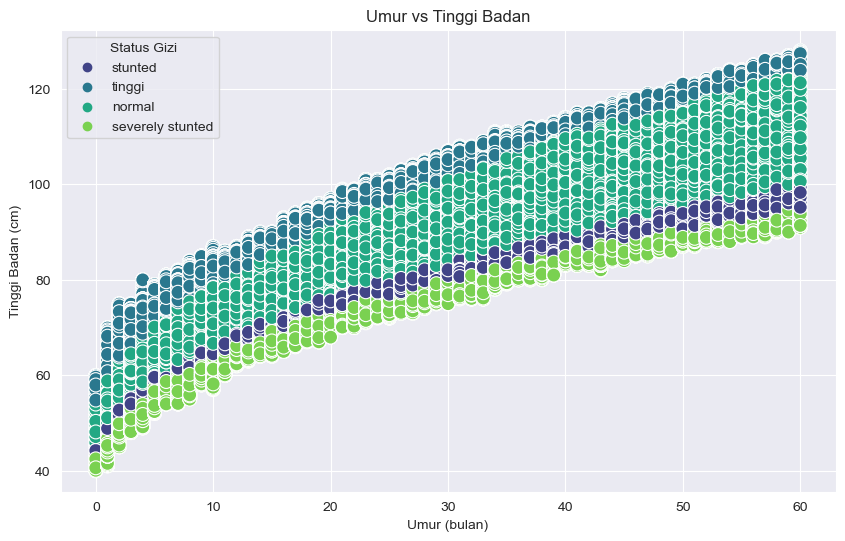

In [21]:

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Umur (bulan)', y='Tinggi Badan (cm)', hue='Status Gizi', palette='viridis', s=100)
plt.title('Umur vs Tinggi Badan')
plt.show()


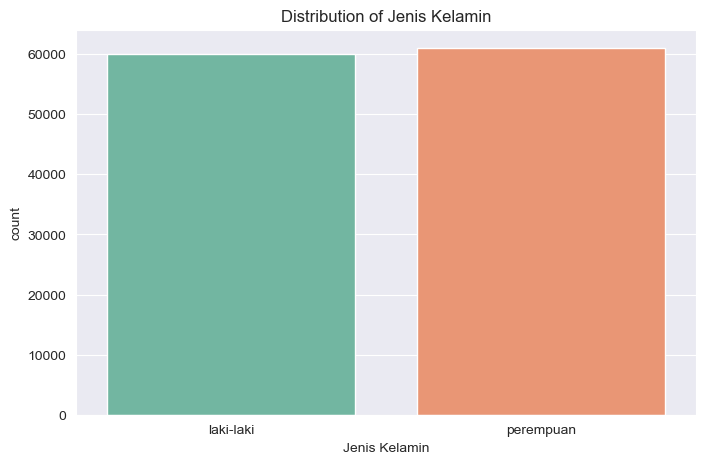

In [22]:
# Bar plot for Jenis Kelamin
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Jenis Kelamin', palette='Set2')
plt.title('Distribution of Jenis Kelamin')
plt.show()


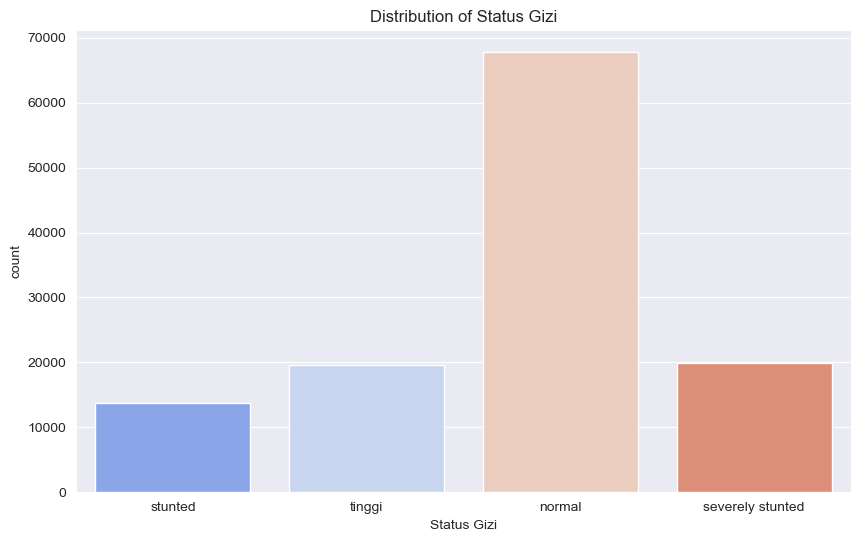

In [23]:
# Bar plot for Status Gizi
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Status Gizi', palette='coolwarm')
plt.title('Distribution of Status Gizi')
plt.show()


In [24]:
# Descriptive statistics
desc_stats = data[['Umur (bulan)', 'Tinggi Badan (cm)']].describe()
print(desc_stats)


        Umur (bulan)  Tinggi Badan (cm)
count  120999.000000      120999.000000
mean       30.173803          88.655434
std        17.575119          17.300997
min         0.000000          40.010437
25%        15.000000          77.000000
50%        30.000000          89.800000
75%        45.000000         101.200000
max        60.000000         128.000000


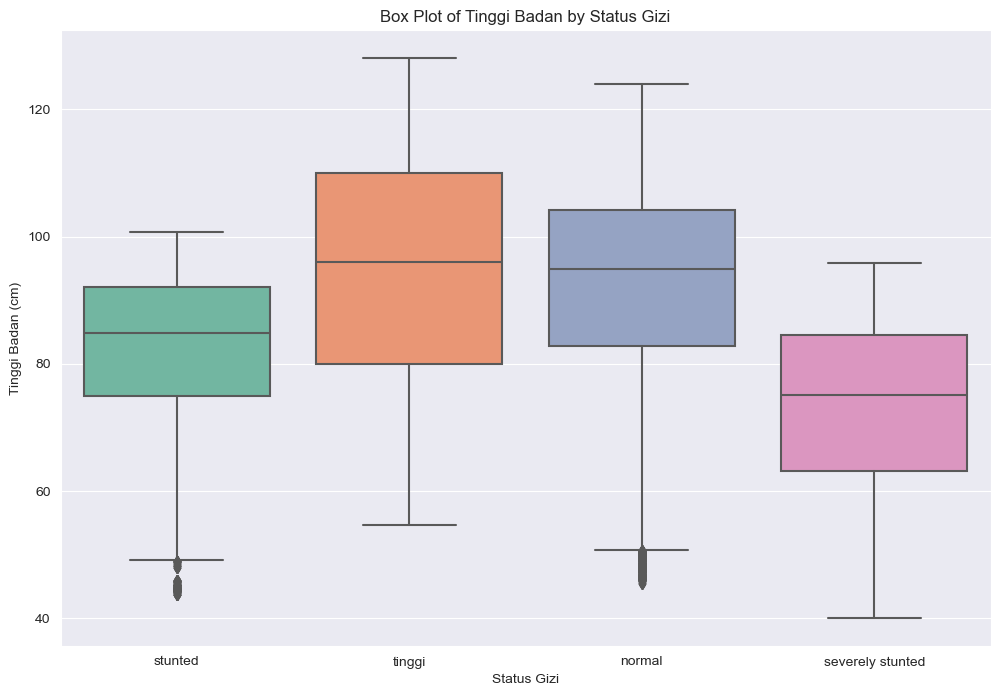

In [25]:
# Box plot for Tinggi Badan by Status Gizi
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Status Gizi', y='Tinggi Badan (cm)', palette='Set2')
plt.title('Box Plot of Tinggi Badan by Status Gizi')
plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
# Assuming your DataFrame is named data
# If not, replace data with your DataFrame name

# Encode categorical variables
label_encoder = LabelEncoder()
data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = label_encoder.fit_transform(data['Status Gizi'])

# Split the dataset into features (X) and target variable (y)
X = data.drop('Status Gizi', axis=1)
y = data['Status Gizi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/50


C:\Users\Hafiz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3025/3025 ━━━━━━━━━━━━━━━━━━━━ 4s 779us/step - accuracy: 0.1920 - loss: -5.6250
Epoch 2/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.2072 - loss: -202.0507
Epoch 3/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - accuracy: 0.2201 - loss: -886.9948
Epoch 4/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - accuracy: 0.2132 - loss: -2578.7766
Epoch 5/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - accuracy: 0.2125 - loss: -4802.3257
Epoch 6/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step - accuracy: 0.2132 - loss: -8191.4170
Epoch 7/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.2140 - loss: -13116.6748
Epoch 8/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.2083 - loss: -18920.1211
Epoch 9/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 3s 820us/step - accuracy: 0.2182 - loss: -27602.8828
Epoch 10/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step - accuracy: 0.2081 - loss: -40206.7852
Epoch 11/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - accuracy: 0.

KeyboardInterrupt: 

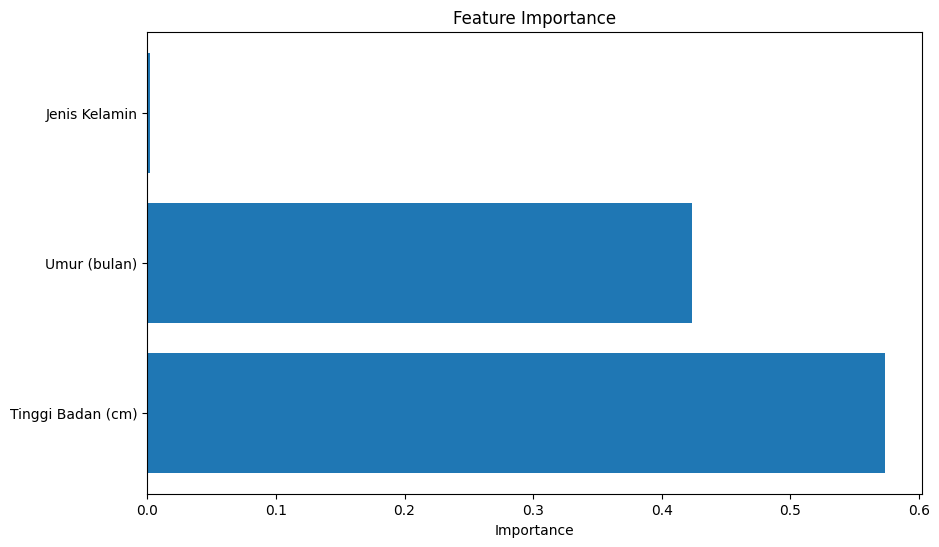

In [14]:
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


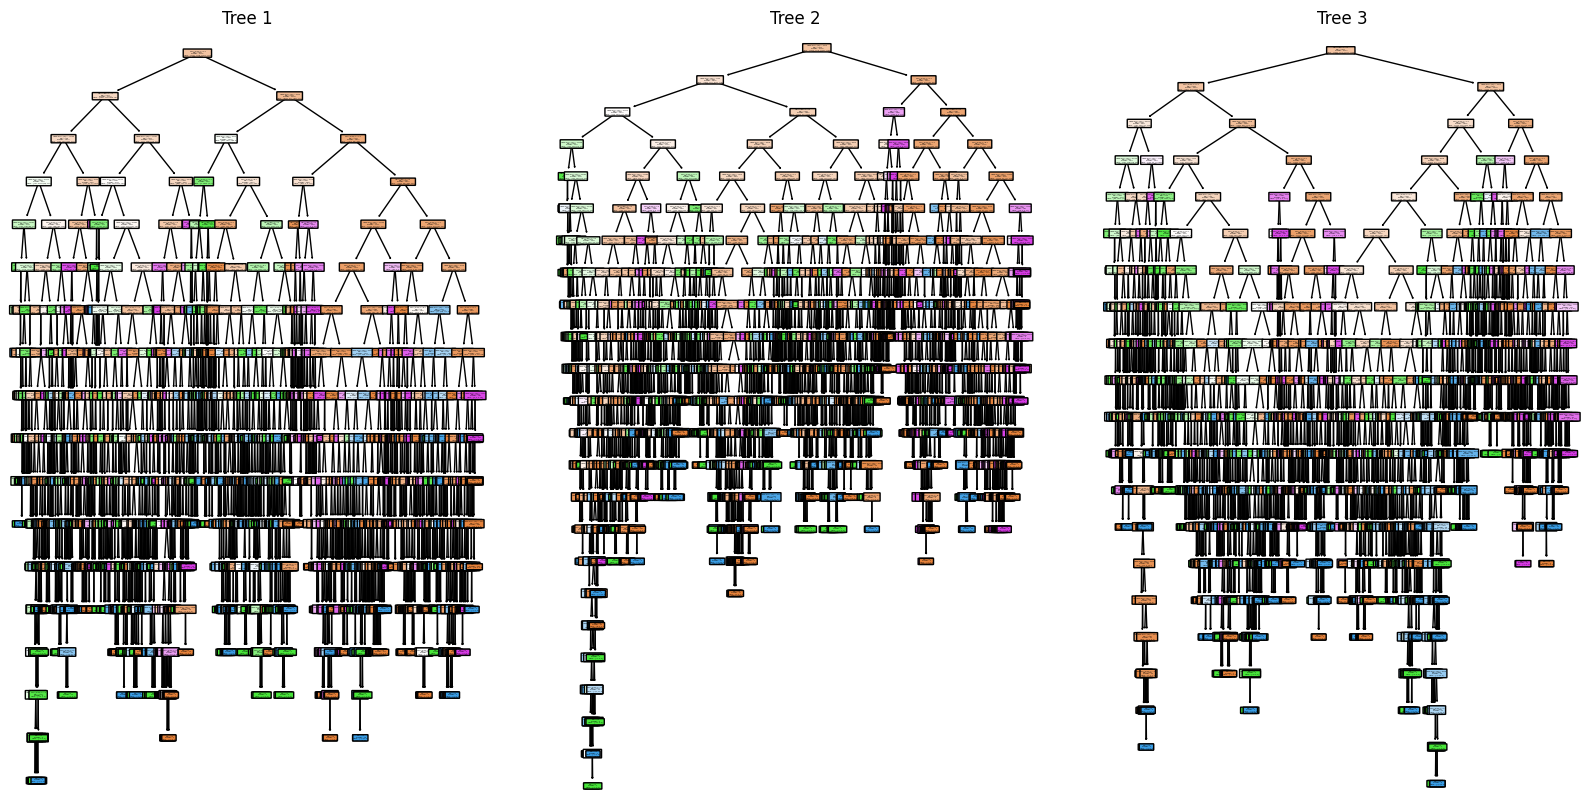

In [15]:
# Visualize the first few trees in the Random Forest
plt.figure(figsize=(20, 10))
for i in range(3):  # Adjust the number of trees to visualize as needed
    plt.subplot(1, 3, i + 1)
    plot_tree(model.estimators_[i], feature_names=feature_names, class_names=label_encoder.classes_, filled=True, rounded=True)
    plt.title(f'Tree {i + 1}')
plt.show()
